In [1]:
import os
import gzip
import numpy as np
import pandas as pd
import transportation_tutorials as tt

In [2]:
# Ex1 groupby transform
districts = pd.read_csv(tt.data('FL-COUNTY-BY-DISTRICT'))
districts

,County,District
0,Charlotte,1
1,Collier,1
2,DeSoto,1
3,Glades,1
4,Hardee,1
...,...,...
62,Citrus,7
63,Hernando,7
64,Hillsborough,7
65,Pasco,7


In [3]:
bridges = pd.read_csv(tt.data('FL-BRIDGES'))
# Recall the necessary cleaning for the bridges data file
bridges = bridges.replace('-', 0)
bridges[['Poor #', 'SD #']] = bridges[['Poor #', 'SD #']].astype(int)
bridges.fillna(0, inplace=True)
bridges

,County,Total #,Good #,Fair #,Poor #,SD #,Total Area,Good Area,Fair Area,Poor Area,SD Area
0,ALACHUA (001),111,64,47,0,0,64767,55794,8973,0.0,0.0
1,BAKER (003),89,30,52,7,8,32162,19369,12282,510.0,623.0
2,BAY (005),122,49,63,10,11,210039,98834,109628,1577.0,10120.0
3,BRADFORD (007),62,23,37,2,2,9330,5492,3217,620.0,620.0
4,BREVARD (009),241,160,81,0,0,364138,204179,159959,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
63,VOLUSIA (127),227,144,76,7,7,326665,164435,147618,14612.0,14612.0
64,WAKULLA (129),50,21,23,6,6,17783,10011,7649,123.0,123.0
65,WALTON (131),219,125,86,8,9,104108,69478,34056,575.0,627.0
66,WASHINGTON (133),96,57,34,5,6,72116,46988,23224,1904.0,3220.0


In [4]:
districts['County']=districts['County'].str.lower()
bridges.iloc[:-1,0]=bridges.iloc[:-1,0].str[:-6]
bridges['County']=bridges['County'].str.lower()
# bridges.sort_values('County').to_csv('b.csv')
# districts.sort_values('County').to_csv('d.csv')

In [5]:
bridges_new=pd.merge(districts,bridges,left_on='County',right_on='County')
bridges_new.head()

,County,District,Total #,Good #,Fair #,Poor #,SD #,Total Area,Good Area,Fair Area,Poor Area,SD Area
0,charlotte,1,207,172,35,0,1,250385,229102,21284,0.0,1511.0
1,collier,1,356,281,73,2,2,190375,158006,32207,162.0,162.0
2,glades,1,59,43,16,0,0,42294,35081,7213,0.0,0.0
3,hardee,1,91,64,26,1,1,26997,20293,6548,155.0,155.0
4,hendry,1,81,63,18,0,0,18807,14827,3980,0.0,0.0


In [6]:
# Q1.Within each FDOT District, what is the fraction of structurally deficient bridge deck area in each County?
bridges_new['SD_fraction']=bridges_new.groupby('District')['SD Area'].transform(lambda x: x/x.sum())
bridges_new.head()

,County,District,Total #,Good #,Fair #,Poor #,SD #,Total Area,Good Area,Fair Area,Poor Area,SD Area,SD_fraction
0,charlotte,1,207,172,35,0,1,250385,229102,21284,0.0,1511.0,0.105179
1,collier,1,356,281,73,2,2,190375,158006,32207,162.0,162.0,0.011277
2,glades,1,59,43,16,0,0,42294,35081,7213,0.0,0.0,0.000000
3,hardee,1,91,64,26,1,1,26997,20293,6548,155.0,155.0,0.010789
4,hendry,1,81,63,18,0,0,18807,14827,3980,0.0,0.0,0.000000


In [7]:
# Q2.Which county has the highest share of structurally deficient bridge deck area within its FDOT District?
bridges_new.loc[bridges_new['SD_fraction'].idxmax(),'County']

'palm beach'

In [8]:
# Ex2 pivot tables
tour = pd.read_csv(tt.data('SERPM8-BASE2015-TOURS'))
tour.head()

,hh_id,person_id,person_num,person_type,tour_id,tour_category,tour_purpose,orig_mgra,dest_mgra,start_period,...,prob_11,prob_12,prob_13,prob_14,prob_15,prob_16,prob_17,prob_18,prob_19,prob_20
0,1690841,4502948,1,1,0,MANDATORY,Work,7736,9290,8,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1690841,4502948,1,1,1,AT_WORK,Work-Based,9290,7980,13,...,0.000319,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1690841,4502948,1,1,2,AT_WORK,Work-Based,9290,10608,19,...,0.000157,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1690841,4502949,2,2,0,MANDATORY,Work,7736,8289,27,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1690841,4502949,2,2,1,MANDATORY,Work,7736,8289,31,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
tour_mode_dict = {
    1: "DRIVEALONEFREE",
    2: "DRIVEALONEPAY",
    3: "SHARED2GP",
    4: "SHARED2PAY",
    5: "SHARED3GP",
    6: "SHARED3PAY",
    7: "TNCALONE",
    8: "TNCSHARED",
    9: "WALK",
    10: "BIKE",
    11: "WALK_MIX",
    12: "WALK_PRMW",
    13: "WALK_PRMD",
    14: "PNR_MIX",
    15: "PNR_PRMW",
    16: "PNR_PRMD",
    17: "KNR_MIX",
    18: "KNR_PRMW",
    19: "KNR_PRMD",
    20: "SCHBUS",
}

In [10]:
tour['tour_mode']=tour['tour_mode'].map(tour_mode_dict)
tour.head()

,hh_id,person_id,person_num,person_type,tour_id,tour_category,tour_purpose,orig_mgra,dest_mgra,start_period,...,prob_11,prob_12,prob_13,prob_14,prob_15,prob_16,prob_17,prob_18,prob_19,prob_20
0,1690841,4502948,1,1,0,MANDATORY,Work,7736,9290,8,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1690841,4502948,1,1,1,AT_WORK,Work-Based,9290,7980,13,...,0.000319,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1690841,4502948,1,1,2,AT_WORK,Work-Based,9290,10608,19,...,0.000157,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1690841,4502949,2,2,0,MANDATORY,Work,7736,8289,27,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1690841,4502949,2,2,1,MANDATORY,Work,7736,8289,31,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
# Q1.Within the Jupiter study area, what is the average distance for bike tours to work? (Hint: It is 4.03 miles)
tour_p1=tour.pivot_table(
    index='tour_purpose',
    columns='tour_mode',
    values='tour_distance'
)
print(tour_p1.loc['Work','BIKE'])
tour_p1

4.034763485477179


tour_mode,BIKE,DRIVEALONEFREE,DRIVEALONEPAY,KNR_MIX,KNR_PRMD,KNR_PRMW,PNR_MIX,PNR_PRMD,PNR_PRMW,SCHBUS,SHARED2GP,SHARED2PAY,SHARED3GP,SHARED3PAY,WALK,WALK_MIX
tour_purpose,,,,,,,,,,,,,,,,
Discretionary,2.764216,5.681107,38.526133,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.469143,26.186025,7.622825,21.648273,0.637523,3.486778
Eating Out,3.739237,6.299282,21.259400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.521744,22.228364,6.677294,22.139000,0.906817,3.483111
Escort,NaN,3.848886,23.726999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.544895,23.677999,6.378542,25.274000,0.491000,5.693667
Maintenance,2.872279,4.993209,22.798727,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.026752,28.893666,6.842151,20.237000,0.782691,4.597381
School,3.100353,4.396832,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.816528,4.176316,NaN,4.308441,NaN,0.973146,2.434500
Shop,4.323302,8.658878,59.314263,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.935834,59.844746,10.631094,59.383289,0.810000,8.946885
University,4.953091,7.974719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.809288,21.773001,8.269645,16.806000,1.343474,3.589333
Visiting,2.448940,6.533719,34.439682,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.371339,33.488765,8.709989,38.686500,0.612707,3.416000
Work,4.034763,12.089045,38.741760,33.41,37.558556,39.154332,21.311667,61.115,58.980637,NaN,13.427365,39.481301,13.986657,37.353821,0.714053,9.022067


In [12]:
# Q2.What tour purpose has the highest average tour distance? (Hint: Work tours)
tour_p2=tour.pivot_table(
    index='tour_purpose',
    columns='tour_mode',
    values='tour_distance',
    margins=True
)
print(tour_p2.loc[:,'All'].idxmax())
tour_p2

Work


tour_mode,BIKE,DRIVEALONEFREE,DRIVEALONEPAY,KNR_MIX,KNR_PRMD,KNR_PRMW,PNR_MIX,PNR_PRMD,PNR_PRMW,SCHBUS,SHARED2GP,SHARED2PAY,SHARED3GP,SHARED3PAY,WALK,WALK_MIX,All
tour_purpose,,,,,,,,,,,,,,,,,
Discretionary,2.764216,5.681107,38.526133,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.469143,26.186025,7.622825,21.648273,0.637523,3.486778,6.355063
Eating Out,3.739237,6.299282,21.259400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.521744,22.228364,6.677294,22.139000,0.906817,3.483111,6.341543
Escort,NaN,3.848886,23.726999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.544895,23.677999,6.378542,25.274000,0.491000,5.693667,4.266534
Maintenance,2.872279,4.993209,22.798727,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.026752,28.893666,6.842151,20.237000,0.782691,4.597381,5.413463
School,3.100353,4.396832,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.816528,4.176316,NaN,4.308441,NaN,0.973146,2.434500,4.534350
Shop,4.323302,8.658878,59.314263,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.935834,59.844746,10.631094,59.383289,0.810000,8.946885,13.421542
University,4.953091,7.974719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.809288,21.773001,8.269645,16.806000,1.343474,3.589333,7.796431
Visiting,2.448940,6.533719,34.439682,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.371339,33.488765,8.709989,38.686500,0.612707,3.416000,7.534867
Work,4.034763,12.089045,38.741760,33.41,37.558556,39.154332,21.311667,61.115,58.980637,NaN,13.427365,39.481301,13.986657,37.353821,0.714053,9.022067,15.804213


In [13]:
# Q3.What is the median distance of walking for all tour purposes? (Hint: 0.548 miles)
tour_p3=tour.pivot_table(
    columns='tour_mode',
    values='tour_distance',
    aggfunc='median'
)
print(tour_p3.loc[:,'WALK'])
tour_p3

tour_distance    0.548
Name: WALK, dtype: float64


tour_mode,BIKE,DRIVEALONEFREE,DRIVEALONEPAY,KNR_MIX,KNR_PRMD,KNR_PRMW,PNR_MIX,PNR_PRMD,PNR_PRMW,SCHBUS,SHARED2GP,SHARED2PAY,SHARED3GP,SHARED3PAY,WALK,WALK_MIX
tour_distance,2.8905,6.098,31.275,29.497999,36.278,18.084999,16.518,55.566002,56.125999,2.624,5.912,31.558,5.085,30.006001,0.548,3.294


In [14]:
# Ex3 linear regresssion
import statsmodels.api as sm

In [15]:
per = pd.read_csv(tt.data('SERPM8-BASE2015-PERSONS'))
hh = pd.read_csv(tt.data('SERPM8-BASE2015-HOUSEHOLDS'))

In [16]:
per.head()

,hh_id,person_id,person_num,age,gender,type,value_of_time,activity_pattern,imf_choice,inmf_choice,fp_choice,reimb_pct,wrkr_type
0,1690841,4502948,1,46,m,Full-time worker,5.072472,M,1,1,-1,0.0,0
1,1690841,4502949,2,47,f,Part-time worker,5.072472,M,2,37,-1,0.0,0
2,1690841,4502950,3,11,f,Student of non-driving age,3.381665,M,3,1,-1,0.0,0
3,1690841,4502951,4,8,m,Student of non-driving age,3.381665,M,3,1,-1,0.0,0
4,1690961,4503286,1,52,m,Part-time worker,2.447870,M,1,2,-1,0.0,0


In [17]:
hh.head()

,Unnamed: 0,hh_id,home_mgra,income,autos,transponder,cdap_pattern,jtf_choice,autotech,tncmemb
0,426629,1690841,7736,512000,2,1,MMMM0,0,0,0
1,426630,1690961,7736,27500,1,0,MNMM0,0,0,0
2,426631,1690866,7736,150000,2,0,HMM0,0,0,0
3,426632,1690895,7736,104000,2,1,MMMM0,0,0,0
4,426633,1690933,7736,95000,2,1,MNM0,0,0,0


In [18]:
per['gender']=pd.get_dummies(per['gender']).iloc[:,0]
per['type']=pd.get_dummies(per['type']).loc[:,'Full-time worker']
# per['female'] = np.where((per.gender == 'f'), 1, 0)
# per['full_time'] = np.where((per.type == 'Full-time worker'), 1, 0)
hh['income_100k'] = hh.income / 100000
per.head()

,hh_id,person_id,person_num,age,gender,type,value_of_time,activity_pattern,imf_choice,inmf_choice,fp_choice,reimb_pct,wrkr_type
0,1690841,4502948,1,46,0,1,5.072472,M,1,1,-1,0.0,0
1,1690841,4502949,2,47,1,0,5.072472,M,2,37,-1,0.0,0
2,1690841,4502950,3,11,1,0,3.381665,M,3,1,-1,0.0,0
3,1690841,4502951,4,8,0,0,3.381665,M,3,1,-1,0.0,0
4,1690961,4503286,1,52,0,0,2.447870,M,1,2,-1,0.0,0


In [19]:
perhh=pd.merge(per[['hh_id','age','gender','type','value_of_time']],hh[['hh_id','income_100k']],on='hh_id')
perhh.head()
# perhh.info()

,hh_id,age,gender,type,value_of_time,income_100k
0,1690841,46,0,1,5.072472,5.120
1,1690841,47,1,0,5.072472,5.120
2,1690841,11,1,0,3.381665,5.120
3,1690841,8,0,0,3.381665,5.120
4,1690961,52,0,0,2.447870,0.275


In [20]:
# Q1.What are the coefficients on this model?
mod=sm.OLS(perhh.value_of_time,sm.add_constant(perhh[['age','gender','type','income_100k']]))
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:          value_of_time   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     384.5
Date:                Mon, 13 Jul 2020   Prob (F-statistic):               0.00
Time:                        23:41:00   Log-Likelihood:            -1.4546e+05
No. Observations:               40683   AIC:                         2.909e+05
Df Residuals:                   40678   BIC:                         2.910e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           6.9651      0.116     60.046      

In [21]:
# Q2.Do any of these factors appear to actually be not relevant in determining an individual’s value of time? (Hint: Gender)
# gender, because the absolute value of its t-statistic is only 0.399 and is less than 1.96

In [22]:
# Ex4 heatmap
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
trip = pd.read_csv(tt.data('SERPM8-BASE2015-TRIPS'))
trip.head()

,hh_id,person_id,person_num,tour_id,stop_id,inbound,tour_purpose,orig_purpose,dest_purpose,orig_mgra,dest_mgra,parking_mgra,stop_period,trip_mode,trip_board_tap,trip_alight_tap,tour_mode,smplRate_geo,autotech,tncmemb
0,1690841,4502948,1,0,-1,0,Work,Home,Work,7736,9290,-1,8,6,0,0,6,1.0,0,0
1,1690841,4502948,1,0,-1,1,Work,Work,Home,9290,7736,0,29,3,0,0,6,1.0,0,0
2,1690841,4502948,1,1,-1,0,Work-Based,Work,Work-Based,9290,7980,-1,13,1,0,0,1,1.0,0,0
3,1690841,4502948,1,1,-1,1,Work-Based,Work-Based,Work,7980,9290,-1,14,1,0,0,1,1.0,0,0
4,1690841,4502948,1,2,-1,0,Work-Based,Work,Work-Based,9290,10608,-1,19,3,0,0,3,1.0,0,0


In [24]:
hh = pd.read_csv(tt.data('SERPM8-BASE2015-HOUSEHOLDS'))
hh.head()

,Unnamed: 0,hh_id,home_mgra,income,autos,transponder,cdap_pattern,jtf_choice,autotech,tncmemb
0,426629,1690841,7736,512000,2,1,MMMM0,0,0,0
1,426630,1690961,7736,27500,1,0,MNMM0,0,0,0
2,426631,1690866,7736,150000,2,0,HMM0,0,0,0
3,426632,1690895,7736,104000,2,1,MMMM0,0,0,0
4,426633,1690933,7736,95000,2,1,MNM0,0,0,0


In [25]:
hhtrip=pd.merge(hh[['hh_id','autos']],trip.groupby('hh_id').size().rename('trip_size'),left_on='hh_id',right_index=True)
hhtrip.head()

,hh_id,autos,trip_size
0,1690841,2,20
1,1690961,1,16
2,1690866,2,10
3,1690895,2,10
4,1690933,2,6


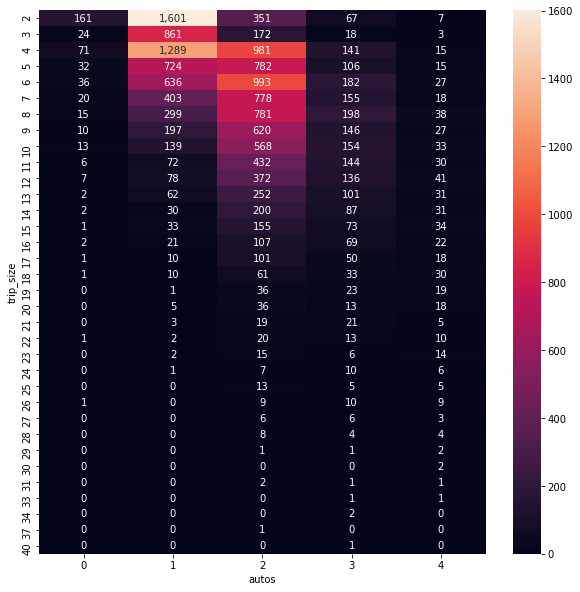

In [26]:
plt.figure(figsize=(10,10))
sns.heatmap(hhtrip.pivot_table(index='trip_size',columns='autos',aggfunc='size').fillna(0),
           annot=True,
           fmt=",.0f")

In [27]:
# Q1.For households with 2 automobiles, what is the most frequent number of trips made by those households in the data?
# from the heatmap, the answer is 6
# Q2.For households making 2 trips in the data, how many automobiles do most households own?
# from the heatmap, the answer is 1 automobile

In [28]:
# Ex 5 boxplot
hh = pd.read_csv(tt.data('SERPM8-BASE2015-HOUSEHOLDS'))
hh.head()

,Unnamed: 0,hh_id,home_mgra,income,autos,transponder,cdap_pattern,jtf_choice,autotech,tncmemb
0,426629,1690841,7736,512000,2,1,MMMM0,0,0,0
1,426630,1690961,7736,27500,1,0,MNMM0,0,0,0
2,426631,1690866,7736,150000,2,0,HMM0,0,0,0
3,426632,1690895,7736,104000,2,1,MMMM0,0,0,0
4,426633,1690933,7736,95000,2,1,MNM0,0,0,0


In [29]:
# !!!!!remove those where incomes are reported as zero or less than sero. (I saw the solution)
hh = hh[(hh.income > 0) & (hh.income != 0)]
hh

,Unnamed: 0,hh_id,home_mgra,income,autos,transponder,cdap_pattern,jtf_choice,autotech,tncmemb
0,426629,1690841,7736,512000,2,1,MMMM0,0,0,0
1,426630,1690961,7736,27500,1,0,MNMM0,0,0,0
2,426631,1690866,7736,150000,2,0,HMM0,0,0,0
3,426632,1690895,7736,104000,2,1,MMMM0,0,0,0
4,426633,1690933,7736,95000,2,1,MNM0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
18173,568928,1726346,11694,443000,3,1,MMM0,0,0,0
18174,568929,1726458,11694,61400,2,1,NMM0,0,0,0
18175,568930,1726382,11694,58000,1,1,N0,0,0,0
18176,568931,1726441,11694,55000,1,0,M0,0,0,0


In [30]:
person = pd.read_csv(tt.data('SERPM8-BASE2015-PERSONS'))
person.head()

,hh_id,person_id,person_num,age,gender,type,value_of_time,activity_pattern,imf_choice,inmf_choice,fp_choice,reimb_pct,wrkr_type
0,1690841,4502948,1,46,m,Full-time worker,5.072472,M,1,1,-1,0.0,0
1,1690841,4502949,2,47,f,Part-time worker,5.072472,M,2,37,-1,0.0,0
2,1690841,4502950,3,11,f,Student of non-driving age,3.381665,M,3,1,-1,0.0,0
3,1690841,4502951,4,8,m,Student of non-driving age,3.381665,M,3,1,-1,0.0,0
4,1690961,4503286,1,52,m,Part-time worker,2.447870,M,1,2,-1,0.0,0


96000.0

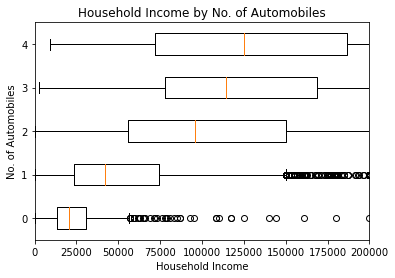

In [31]:
# Q1.Use a boxplot to show the distribution of household income in the Jupiter study area, by number of automobiles owned. What is the median income of households who own exactly two automobiles? (Hint: the correct answer is $96 thousand.)
data=list(hh.groupby('autos').income)
plt.boxplot( [i[1] for i in data], vert=False, labels=[i[0] for i in data])
plt.xlim(0,200000)
plt.title('Household Income by No. of Automobiles')
plt.xlabel('Household Income')
plt.ylabel('No. of Automobiles') 
hh[hh['autos']==2].income.median()

92100.0

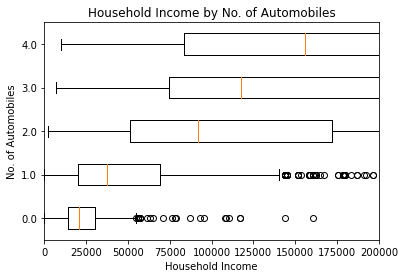

In [32]:
# Q2.Is the median income higher or lower if we only consider two-car households that have at least one person over age 65? Create a set of box plots similar to those created in question (1), but only for households with at least one person over age 65.
per65=per.groupby('hh_id').max()
per65=per65[per65['age']>65]
hh65=pd.merge(hh,per65,on='hh_id',how='right')
# max_age = person.groupby(['hh_id'])['age'].max().rename('max_age')
# hh_2 = pd.merge(hh, max_age, on='hh_id', how='left')
# hh_2 = hh_2[(hh_2.max_age > 65) & (hh_2.income > 0)]
data65=list(hh65.groupby('autos').income)
plt.boxplot( [i[1] for i in data65], vert=False, labels=[i[0] for i in data65])
plt.xlim(0,200000)
plt.title('Household Income by No. of Automobiles')
plt.xlabel('Household Income')
plt.ylabel('No. of Automobiles')
hh65[hh65['autos']==2].income.median()
# the median is lower

In [33]:
# # copied from the solution
# plt.boxplot(
#     [i[1] for i in data],
#     vert = False,
#     labels = [i[0] for i in data],
#     notch = True,
#     widths = 0.6,
#     positions = range(2, (len(data))*2+2, 2),
# )

# hh_box_2 = list(hh_2.groupby('autos').income)
# plt.boxplot(
#     [i[1] for i in data65],
#     vert = False,
#     labels = [str(i[0])+"*" for i in data65],
#     notch = True,
#     widths = 0.6,
#     positions = range(1, (len(data65))*2+1, 2),
#     boxprops=dict(color="red"),
#     whiskerprops=dict(color="red"),
#     capprops=dict(color="red"),
#     flierprops=dict(markeredgecolor="red"),
# )
# plt.xlim(-10000,200000)
# plt.title('Household Income by Number of Autos')
# plt.xlabel('Household Income')
# plt.ylabel('Autos')